<a href="https://colab.research.google.com/github/arico97/alexrico.github.io/blob/main/Real_time_news_analysis_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U "transformers==4.40.0" --upgrade
!pip install accelerate bitsandbytes

In [ ]:
import os
os._exit(00)

In [ ]:
import transformers
import torch

In [ ]:
! pip install newsapi-python

In [ ]:
import pandas as pd
from newsapi import NewsApiClient
import matplotlib.pyplot as plt

In [ ]:


# Init
newsapi = NewsApiClient(api_key='3f31b8e4c8f743f9bb2af8b97c4bacfb')



In [ ]:
# /v2/top-headlines
top_headlines = newsapi.get_top_headlines(
                                          category='business',
                                          language='en')

# /v2/everything
all_articles = newsapi.get_everything(q='football',
                                      language='en')

# /v2/top-headlines/sources
sources = newsapi.get_sources()

In [ ]:
art=pd.DataFrame(all_articles['articles'])

In [ ]:
top_headlines = pd.DataFrame(top_headlines['articles'])

In [ ]:
top_headlines

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Carwale.com'}",Aditya Nadkarni,Mahindra XUV.e9 spy shots reveal new features ...,The XUV700-based electric coupe SUV will arriv...,https://www.carwale.com/news/mahindra-xuve9-sp...,https://imgd.aeplcdn.com/642x336/n/cw/ec/17904...,2024-06-09T09:13:49Z,<ul><li>The XUV700-based electric coupe SUV wi...
1,"{'id': None, 'name': 'NDTV News'}",None,Elon Musk May Leave Tesla If $56 Billion Pay N...,"""Motivating someone like Elon requires somethi...",https://www.ndtv.com/world-news/elon-musk-may-...,https://c.ndtvimg.com/2024-04/a945hc54_elon-mu...,2024-06-09T08:58:30Z,Mr Musk's other ventures have concerned invest...
2,"{'id': 'the-times-of-india', 'name': 'The Time...",TOI Tech Desk,"Elon Musk introduces Ashok, the techie who lea...",TECH NEWS : Ashok Elluswamy's contributions le...,https://timesofindia.indiatimes.com/technology...,https://static.toiimg.com/thumb/msid-110835834...,2024-06-09T08:46:00Z,None
3,"{'id': None, 'name': 'Livemint'}",Dhanya Nagasundaram,Top Stock Recommendations: Dharmesh Shah of IC...,Top Stock Recommendations: Dharmesh Shah of IC...,https://www.livemint.com/market/stock-market-n...,https://www.livemint.com/lm-img/img/2024/06/08...,2024-06-09T07:21:03Z,Stock Market News: The domestic benchmark indi...
4,"{'id': None, 'name': 'GaadiWaadi.com'}",Team GaadiWaadi,Suzuki Jimny Sierra Sees A Massive Price Cut -...,Suzuki Jimny Sierra prices have been reduced u...,https://gaadiwaadi.com/suzuki-jimny-sierra-see...,https://gaadiwaadi.com/wp-content/uploads/2023...,2024-06-09T06:56:15Z,Suzuki recently announced a price cut for the ...
5,"{'id': None, 'name': 'Livemint'}",Livemint,Mcap of top 10 companies jump ₹3.28 lakh crore...,"Overall, RIL remained the most valued company,...",https://www.livemint.com/market/stock-market-n...,https://www.livemint.com/lm-img/img/2024/06/09...,2024-06-09T06:21:26Z,Eight of India's ten most valued companies col...
6,"{'id': None, 'name': 'Economictimes.com'}",IANS,10 stock ideas to hold until Union Budget 2025...,"With NDA coming into power, investors now feel...",https://m.economictimes.com/markets/stocks/new...,"https://img.etimg.com/thumb/msid-110832540,wid...",2024-06-09T05:39:44Z,"With NDA coming into power, investors now feel..."
7,"{'id': None, 'name': 'The Siasat Daily'}",Sameer Khan,Gold rates in Hyderabad see massive dip - The ...,Gold rates in Hyderabad witnessed decline yest...,https://www.siasat.com/gold-rates-in-hyderabad...,https://cdn.siasat.com/wp-content/uploads/2024...,2024-06-09T05:29:49Z,Hyderabad: The gold rates in Hyderabad witness...
8,"{'id': None, 'name': 'Livemint'}",Vaamanaa Sethi,Upcoming IPOs: 2 new public issues and 4 new l...,"In the mainboard segment, Le Travenues Technol...",https://www.livemint.com/market/ipo/upcoming-i...,https://www.livemint.com/lm-img/img/2024/06/09...,2024-06-09T05:24:59Z,India has emerged as the second-largest initia...
9,"{'id': None, 'name': 'Moneycontrol'}",Mahesh Gowande,Stockology: Bearish week ahead; momentum indic...,"On the upside, 23,460 remains the best target,...",https://www.moneycontrol.com/news/business/mar...,https://images.moneycontrol.com/static-mcnews/...,2024-06-09T04:31:56Z,Stockology is a weekly column by futurologist ...


In [ ]:
srcs = pd.DataFrame(sources['sources'])

In [ ]:
top_headlines[['title','description']]

,title,description
0,Mahindra XUV.e9 spy shots reveal new features ...,The XUV700-based electric coupe SUV will arriv...
1,Elon Musk May Leave Tesla If $56 Billion Pay N...,"""Motivating someone like Elon requires somethi..."
2,"Elon Musk introduces Ashok, the techie who lea...",TECH NEWS : Ashok Elluswamy's contributions le...
3,Top Stock Recommendations: Dharmesh Shah of IC...,Top Stock Recommendations: Dharmesh Shah of IC...
4,Suzuki Jimny Sierra Sees A Massive Price Cut -...,Suzuki Jimny Sierra prices have been reduced u...
5,Mcap of top 10 companies jump ₹3.28 lakh crore...,"Overall, RIL remained the most valued company,..."
6,10 stock ideas to hold until Union Budget 2025...,"With NDA coming into power, investors now feel..."
7,Gold rates in Hyderabad see massive dip - The ...,Gold rates in Hyderabad witnessed decline yest...
8,Upcoming IPOs: 2 new public issues and 4 new l...,"In the mainboard segment, Le Travenues Technol..."
9,Stockology: Bearish week ahead; momentum indic...,"On the upside, 23,460 remains the best target,..."


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
art.head(5)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'Yahoo Entertainment'}",Kris Holt,EA Sports' dormant College Football will reeme...,It's been a long time coming but we finally kn...,https://consent.yahoo.com/v2/collectConsent?se...,None,2024-05-16T17:51:36Z,"If you click 'Accept all', we and our partners..."
1,"{'id': 'bbc-news', 'name': 'BBC News'}",None,Football Focus,Alex Scott looks ahead to the final weekend of...,https://www.bbc.co.uk/programmes/m001zh02,https://ichef.bbci.co.uk/images/ic/1200x675/p0...,2024-05-18T12:00:00Z,"The latest football news, live scores, results..."
2,"{'id': None, 'name': 'BBC News'}",None,Football rules pioneer gains blue plaque tribute,The tribute has been unveiled in Sheffield to ...,https://www.bbc.com/news/articles/c6ppgdp7l53o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-06-01T11:12:24Z,A blue plaque has been unveiled in Sheffield t...
3,"{'id': None, 'name': 'BBC News'}",None,Fantasy football player makes billboard apology,Zac Evans makes a public apology on a billboar...,https://www.bbc.com/news/articles/cw88gxewl10o,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-06-02T09:59:14Z,"Joshua Korber Hoffman,Emily Johnson\r\nThe bil..."
4,"{'id': None, 'name': 'BBC News'}",None,Man found guilty of headbutting Roy Keane,Scott Law attacked the football pundit at the ...,https://www.bbc.com/news/articles/cq553j739vro,https://ichef.bbci.co.uk/news/1024/branded_new...,2024-06-06T09:33:53Z,A man has been found guilty of headbutting for...


In [ ]:
art['all']=art['title'] + ' \n ' + art['description']+ ' \n ' +art['content']

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [ ]:
# Clean Datasets
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter
nltk.download('wordnet')

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Cleaning text from unused characters
def clean_text(text):
  text = str(text).replace(r'http[\w:/\.]+', ' ') # removing urls
  text = str(text).replace(r'[^\.\w\s]', ' ') # remove everything but charactersand punctuation
  text = str(text).replace('[^a-zA-Z]', ' ')
  text = str(text).replace(r'\s\s+', ' ')
  text = text.lower().strip()
  #text = ' '.join(text)
  return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
  text = clean_text(text)
  wordlist = re.sub(r'[^\w\s]', '', text).split()
  #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
  #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
  text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in  stopwords_dict])
  return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
art['tokens'] = art['all'].apply(nltk_preprocess).apply(nltk.word_tokenize)

art['tokens'] = art['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [ ]:

all_words = [word for tokens in art['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
fd_series = pd.Series(freq_dist).sort_values(ascending=False)

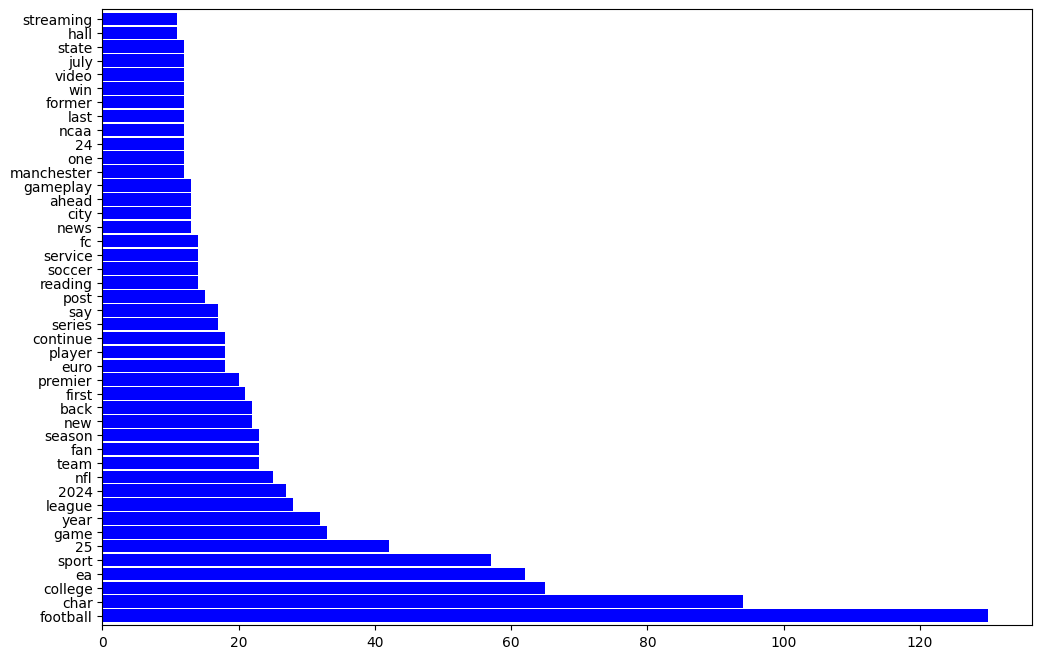

In [ ]:
fd_series[fd_series>10].plot.barh(color='blue', width=.9, figsize=(12, 8));

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
'\n'.join(art['all'])

'EA Sports\' dormant College Football will reemerge, cicada-like, on July 19 \n It\'s been a long time coming but we finally know when College Football 25, EA Sports\' revival of the long-dormant football sim series, will hit consoles. The game will land on PlayStation 5 and Xbox Series X/S on July 19, living up to EA\'s promise that it wou… \n If you click \'Accept all\', we and our partners, including 238 who are part of the IAB Transparency &amp; Consent Framework, will also store and/or access information on a device (in other words, use … [+678 chars]\nFootball Focus \n Alex Scott looks ahead to the final weekend of a fascinating Premier League season. \n The latest football news, live scores, results, tables, video and analysis.\nFootball rules pioneer gains blue plaque tribute \n The tribute has been unveiled in Sheffield to commemorate a "founding father" of the sport. \n A blue plaque has been unveiled in Sheffield to commemorate a "founding father" of football\'s rules.\r\nSi

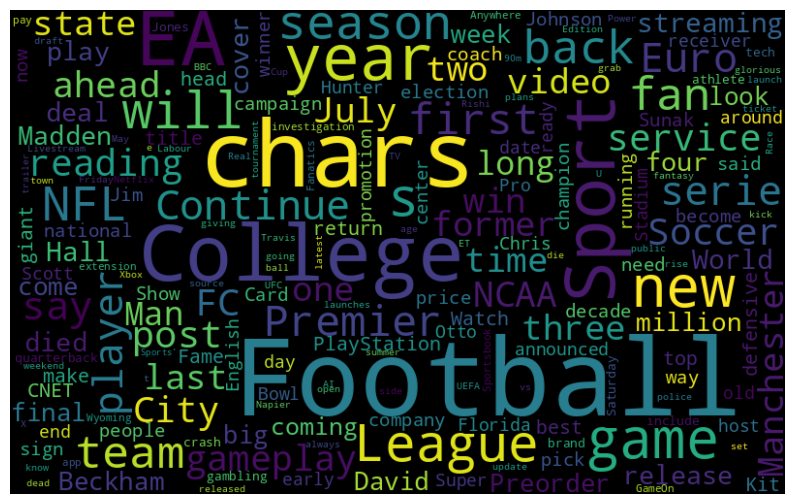

In [ ]:
wordcloud = WordCloud(width=800, height=500, background_color='black', random_state=21, max_font_size=110,stopwords=STOPWORDS,collocations=False).generate('\n'.join(art['all']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Unsupervised learning news classification

In [ ]:
!pip install bertopic

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN

In [ ]:
docs = art['all'].values.tolist()

In [ ]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
corpus_embeddings = embedding_model.encode(docs, show_progress_bar = True)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print([corpus_embeddings.size,  len(docs) ])

[38400, 100]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words = "english", max_df =.95, min_df = .01)
# setting parameters for HDBSCAN (clustering) and UMAP (dimensionality reduction)
hdbscan_model = HDBSCAN(min_cluster_size = 2, metric = 'euclidean',prediction_data = True)
umap_model = UMAP(n_neighbors = 10, n_components = 10, metric ='cosine', low_memory = False)
# Train BERTopic
model = BERTopic(
  vectorizer_model = vectorizer_model,
  nr_topics = 'auto',
  top_n_words = 10,
  umap_model = umap_model,
  hdbscan_model = hdbscan_model,
  min_topic_size = 2, calculate_probabilities = True).fit(docs, corpus_embeddings)

In [ ]:
model.visualize_documents(docs, embeddings = corpus_embeddings)

In [ ]:
model.visualize_barchart()

In [ ]:
representative_docs=model.get_topic_info()['Representative_Docs'].values.tolist()

In [ ]:
model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs = {
        "torch_dtype":torch.float16,
        "low_cpu_mem_usage":True,
    }
)

In [ ]:

prompt_temp="""I'll give you some representative docs from a topic. You have to put a name to this topics, with a maximum length of 3 words. Your output must be this 3 words,without quotation marks. The representative docs are the following:
"""
topics = []
for doc in representative_docs:
  repr_doc='\n'.join(doc)
  prompt_entire=prompt_temp+repr_doc
  messages = [
    {'role':"system", "content":"You are a journalist"},
    {'role':"user", "content":prompt_entire},
  ]
  prompt = pipeline.tokenizer.apply_chat_template(
      messages,
      tokenize=False,
      add_generation_prompt = True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens = 1024,
      eos_token_id = terminators,
      do_sample = True,
      temperature = 0.05,
      top_p = 0.9
  )

  print(outputs[0]["generated_text"][len(prompt):])
  topics.append(outputs[0]["generated_text"][len(prompt):])

Beckham Deals
College Football
European Football
Election Finance
NFL Contracts
Football Hall
Football Kit Design
Sports Crime Scandal
Celebrity Good Deeds
Car Crash Tragedy


In [ ]:
topics

['Beckham Deals',
 'College Football',
 'European Football',
 'Election Finance',
 'NFL Contracts',
 'Football Hall',
 'Football Kit Design',
 'Sports Crime Scandal',
 'Celebrity Good Deeds',
 'Car Crash Tragedy']